# Fatal Police Shooting in the US - Group 6

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning & Merge

In [3]:
#import data
shooting = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")
race = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
income = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
high_school_grad = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")

In [4]:
race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [5]:
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
shooting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


## Clean and merge racial demography with shooting data

In [6]:
#clean race-data
race.replace(["-"],0.0,inplace = True)
race.replace(["(X)"],0.0,inplace = True)
race.loc[:,['share_white','share_black','share_native_american',
            'share_asian','share_hispanic']] = race.loc[:,['share_white','share_black',
                                                           'share_native_american',
                                                           'share_asian','share_hispanic']].astype(float)
area_list = list(race['Geographic area'].unique())

#created a list for each of label because we have city percantages but we need state percentage 
share_white = []
share_black = []
share_native_american= []
share_asian= []
share_hispanic= []

for i in area_list:
    #we add mean of values for each state
    x=race[race["Geographic area"]==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))

In [7]:
diversity_df = pd.DataFrame(zip(area_list, share_white, share_black, share_hispanic), 
                            columns=['state','white','black','hispanic'])
sf = shooting['state'].value_counts()
shooting_by_state = pd.DataFrame({'state':sf.index, 'count':sf.values})
shooting_by_state_race = pd.merge(shooting_by_state, diversity_df, how = 'left', on = 'state')

In [8]:
shooting_B_by_state = shooting[shooting['race'] == 'B']['state'].value_counts()
shooting_B_by_state = pd.DataFrame({'state':shooting_B_by_state.index, 'black_count':shooting_B_by_state.values})

shooting_H_by_state = shooting[shooting['race'] == 'H']['state'].value_counts()
shooting_H_by_state = pd.DataFrame({'state':shooting_H_by_state.index, 'hispanic_count':shooting_H_by_state.values})

shooting_W_by_state = shooting[shooting['race'] == 'W']['state'].value_counts()
shooting_W_by_state = pd.DataFrame({'state':shooting_W_by_state.index, 'white_count':shooting_W_by_state.values})


shooting_by_state = shooting_by_state_race.merge(shooting_B_by_state, how = 'left', on = 'state')
shooting_by_state = shooting_by_state.merge(shooting_H_by_state, how = 'left', on = 'state')
shooting_by_state = shooting_by_state.merge(shooting_W_by_state, how = 'left', on = 'state')


shooting_by_state['white_shoot_pct'] = (shooting_by_state['white_count']/shooting_by_state['count'])*100
shooting_by_state['black_shoot_pct'] = (shooting_by_state['black_count']/shooting_by_state['count'])*100
shooting_by_state['hispanic_shoot_pct'] = (shooting_by_state['hispanic_count']/shooting_by_state['count'])*100

shooting_by_state.fillna(0)

,state,count,white,black,hispanic,black_count,hispanic_count,white_count,white_shoot_pct,black_shoot_pct,hispanic_shoot_pct
0,CA,424,71.535982,2.679645,29.513592,65.0,169.0,125.0,29.481132,15.330189,39.858491
1,TX,225,82.403368,5.866324,39.275000,46.0,66.0,93.0,41.333333,20.444444,29.333333
2,FL,154,78.672500,13.370870,16.529130,49.0,18.0,72.0,46.753247,31.818182,11.688312
3,AZ,118,59.929047,0.954545,20.144568,5.0,37.0,57.0,48.305085,4.237288,31.355932
4,OH,79,92.804070,3.959967,2.130399,30.0,0.0,40.0,50.632911,37.974684,0.000000
5,OK,78,72.925784,3.376262,5.696453,16.0,4.0,47.0,60.256410,20.512821,5.128205
6,CO,74,87.768341,0.917686,17.898690,8.0,21.0,32.0,43.243243,10.810811,28.378378
7,GA,70,62.591534,30.633546,6.415176,23.0,6.0,33.0,47.142857,32.857143,8.571429
8,NC,69,71.516509,20.402300,6.412855,28.0,2.0,37.0,53.623188,40.579710,2.898551
9,MO,64,90.181008,5.862306,2.357946,24.0,2.0,33.0,51.562500,37.500000,3.125000


## Add high school education data

In [9]:
high_school_grad

high_school_grad.replace(["-"],0.0,inplace = True)
high_school_grad.replace(["(X)"],0.0,inplace = True)
high_school_grad.loc[:,'percent_completed_hs'] = high_school_grad.loc[:,'percent_completed_hs'].astype(float)

In [10]:
high_school_st = high_school_grad.groupby('Geographic Area').mean().reset_index()

shooting_by_state = shooting_by_state.merge(high_school_st, how = 'left', left_on = 'state',
                                           right_on = 'Geographic Area')

### Final out to tableau 

In [11]:
shooting_by_state.to_excel("shooting_by_state_race_education.xlsx")

# Data visualization

### 1) Weapon
We found that more than half of the cases the person killed had a gun.

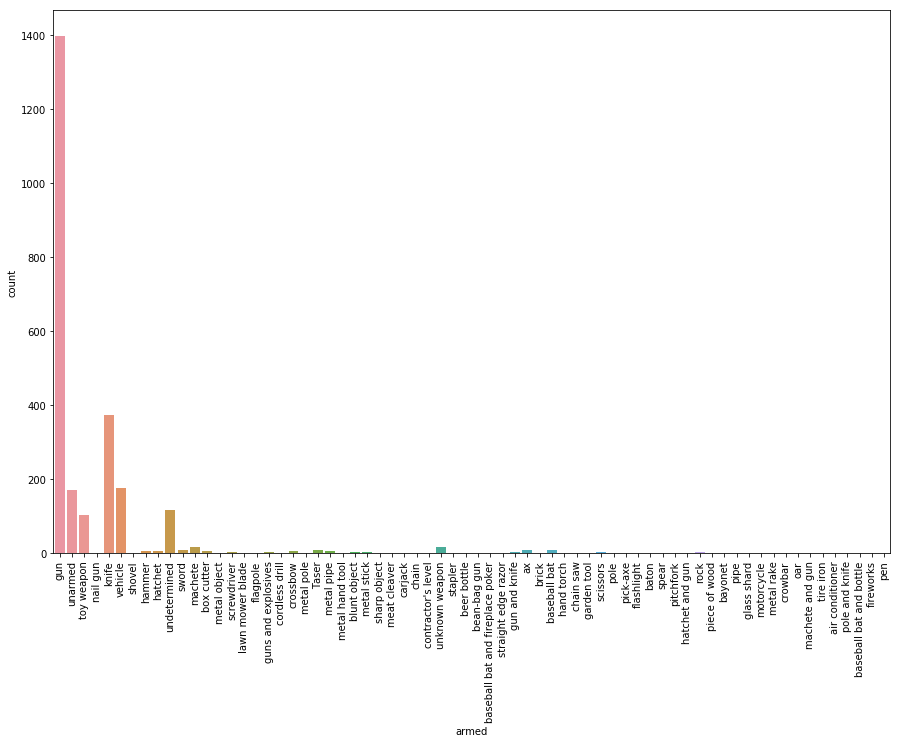

In [45]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="armed", data=shooting)
plt.xticks(rotation=90)
plt.savefig('p1-1.png')

The top 10 weapon. There are a decent amount of cases that are "uncertain", "unarmed"

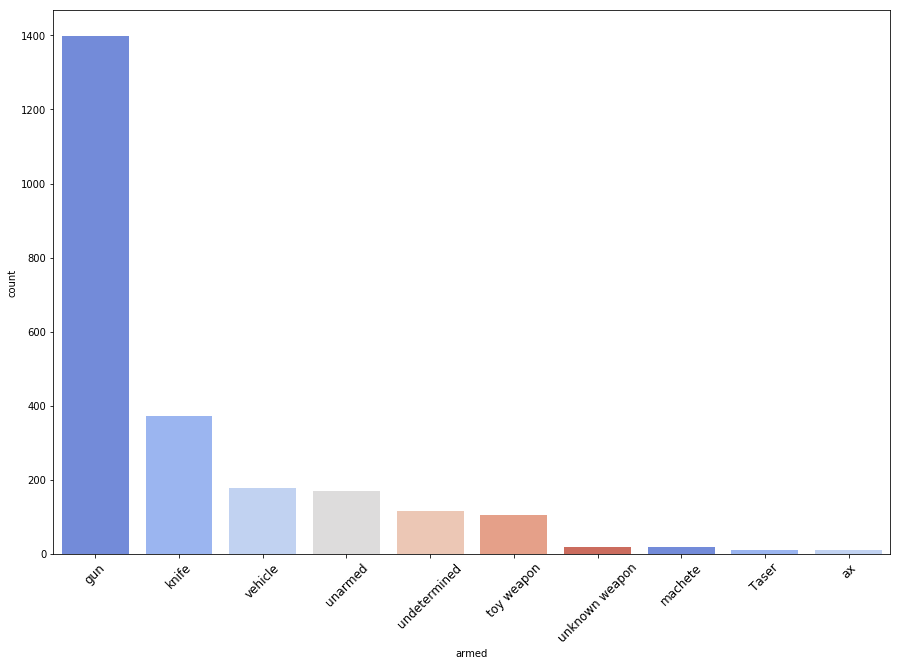

In [46]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="armed", data=shooting, palette = sns.color_palette("coolwarm", 7),
                   order=shooting.armed.value_counts().iloc[:10].index)
plt.xticks(fontsize=12, rotation = 45)
plt.savefig('p1-2.png')

### 2) Race

Initially we tried to find how many people were killed depending upon the race. The following bar chart shows the 
percentage of people killed depending on their race. From the below graph, it is visible that more no of white people were killed than black people. 

Text(0, 0.5, 'Race')

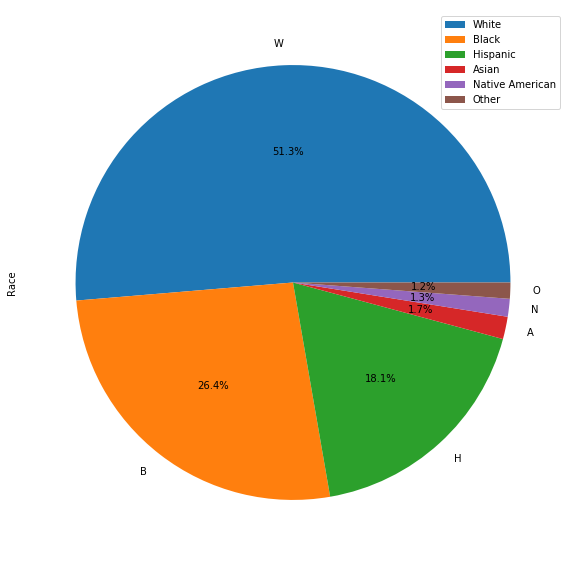

In [7]:
ax=shooting['race'].value_counts().plot(kind='pie',figsize=(10,10),autopct='%1.1f%%')
ax.legend(["White", "Black","Hispanic","Asian","Native American","Other"]);
plt.ylabel("Race")

We then, simply look at the percentage of black people killed by police in each state, we have the following distribution where DC has the higest percentage.
<img src="state_by_pct_shooting_black.png">

However, it is more informational if we adjust the percentage by the ratio of black residents in each state. Now we see a huge shift from the last graph, where NE and IA are the most disproportional states.
<img src="state_pct_black_shooting_adjust.png">

Furthermore, we did a comparison of this adjusted percentage between white and black. There is a very clear and different pattern between the two races, where most states are below the diagnol line for white (less people killed comparing to number of residents) and most states are above the diagnal line for black.

<img src="Black-pct-compare.png">
<img src="White-pct-compare.png">

### 3) Age and Mental Illness

When we count the number of people killed by age and by their mental health status, we found that predominantly the people killed did not have any sign of mental illness. However, the ration between false/true of sign of mental illness starts to approach zero as people are getting older. 
<img src="age_mental_illness.png">

### 4) Education

We did not find a strong pattern associating average high school education in each state and the number of fatal police shooting. 
<img src="Education_shooting.png">

### 5) Gender

We tried to figure out among the people killed, how many were males and females. As expected, there are very less women compared to men who were killed. 

Text(0.5, 1.0, 'No of People killed according to gender')

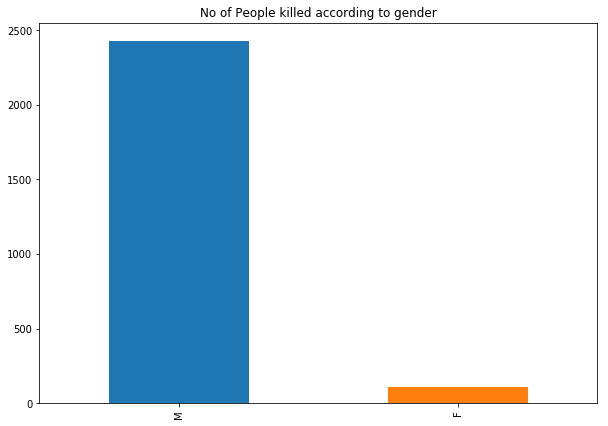

In [11]:
shooting['gender'].value_counts().plot(kind='bar',figsize=(10,7))
plt.title("No of People killed according to gender")

### 6) State and City

In the below graph, we are plotting the no of people killed by each state in the United States. From the below graph, 
it is visible that maximum shootings occured in California, followed by texas and Florida
<img src="shooting by state.png">

We then tried to find out which cities had maximum cases of police shootings. The below grapg displays the top 10 cities with
maximum cases of Police shootings.

C:\Users\Priyanka Dabadge\Anaconda\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Top 10 cities with most no of Shooting cases')

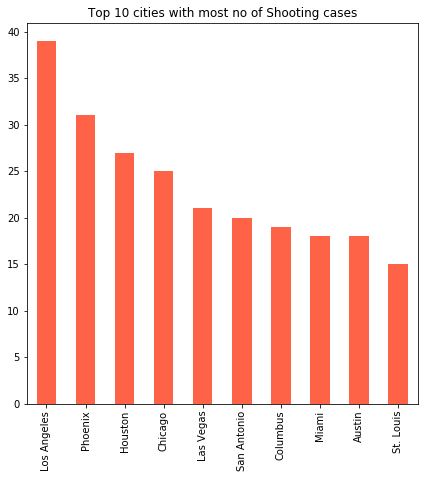

In [16]:
# Displaying top 10 cities with most no of killed people
my_colors=["orange","red","green","purple","pink","salmon","orange","maroon","navy","violet"]
shooting['city'].value_counts().nlargest(10).plot(kind='bar',figsize=(7,7),colors="tomato")
plt.title("Top 10 cities with most no of Shooting cases")

### 7) Age Group

We also tried to find out in which age groups were maximum no of people killed. From the below graph, its visible that most people killed were in the age group of 20 to 30 and 30 to 40. Thus more no of young people were killed than old people. 

In [14]:
bins=[0,10,20,30,40,50,60,70,80,90,100]
groups = shooting.groupby((pd.cut(shooting.age, bins))).count().dropna()
age_groups=pd.DataFrame({"Age Groups":groups.index,"No of People Killed":groups.age})
age_groups.to_excel("killed_agegroup.xlsx")

<img src="age-group.png">

However, we also did find some surprising results. Almost 7 people who were killed were above the age of 80 and 1 person was
less than 10 years old when he was killed.

### 8) Poverty Rate

We then tried to find whether there is some sort of relationship between Poverty rate and the no of shootings. We were expecting that the no of people killed might be depending upon the poverty rate of the state. However, we later found that
there is no such co-relation between poverty rate and no of people killed.

In [17]:
# cleaning the data and converting poverty rate to float values
poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
poverty_level.poverty_rate = poverty_level.poverty_rate.astype(float)

# list containing all the states
area_lst = poverty_level["Geographic Area"].unique()

Text(0.5, 1.0, 'Poverty Rate of Each State')

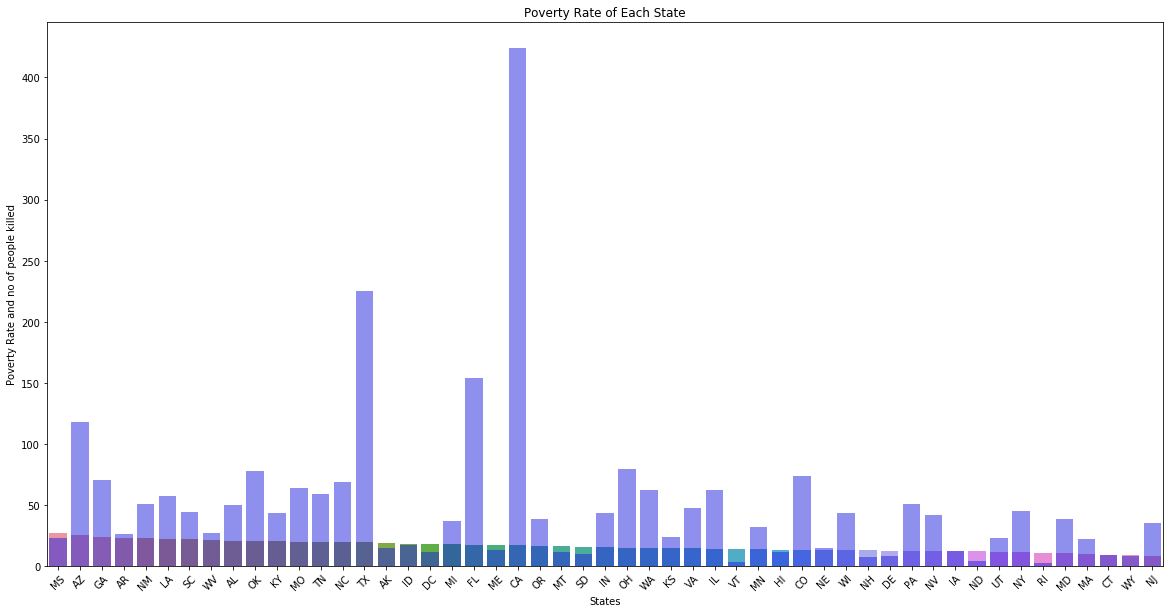

In [23]:
# No of People killed in each state
cnt = shooting['state'].value_counts()
killed = pd.DataFrame({"State":cnt.index,"People Killed":cnt})

# calculating mean poverty ratio for each state
poverty = poverty_level.groupby("Geographic Area")['poverty_rate'].mean()

# creating a dataframe with state name and its respective poverty ratio and sorting the dataframe
data_state_poverty_ratio = pd.DataFrame({'State':poverty.index,'Poverty Rate':poverty})
data_state_poverty_ratio.sort_values('Poverty Rate',ascending=False,inplace=True)

killed_poverty = pd.merge(killed,data_state_poverty_ratio)
killed_poverty.to_excel("killed_poverty.xlsx")

# plotting the graph
f,ax1 = plt.subplots(figsize = (20,10))
sns.barplot(x=data_state_poverty_ratio['State'], y=data_state_poverty_ratio['Poverty Rate'])
sns.barplot(x='State',y ='People Killed',data=killed_poverty.sort_values(by=['Poverty Rate'],ascending=False)
            ,color='blue',alpha = 0.5)
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate and no of people killed')
plt.title('Poverty Rate of Each State')

In the above graph, the y axis represents the poverty rate of the respective state and the no of people killed in that state.
The graph is ordered in descending order of the poverty rate. Thus, New Jersey has lowest poverty rate and Mississippi has the highest poverty rate.  

### 8) Income

We also tried to find association between income levels of the state and no of police shootings. However we did not find any relation between the income levels of state and the no of police shootings.

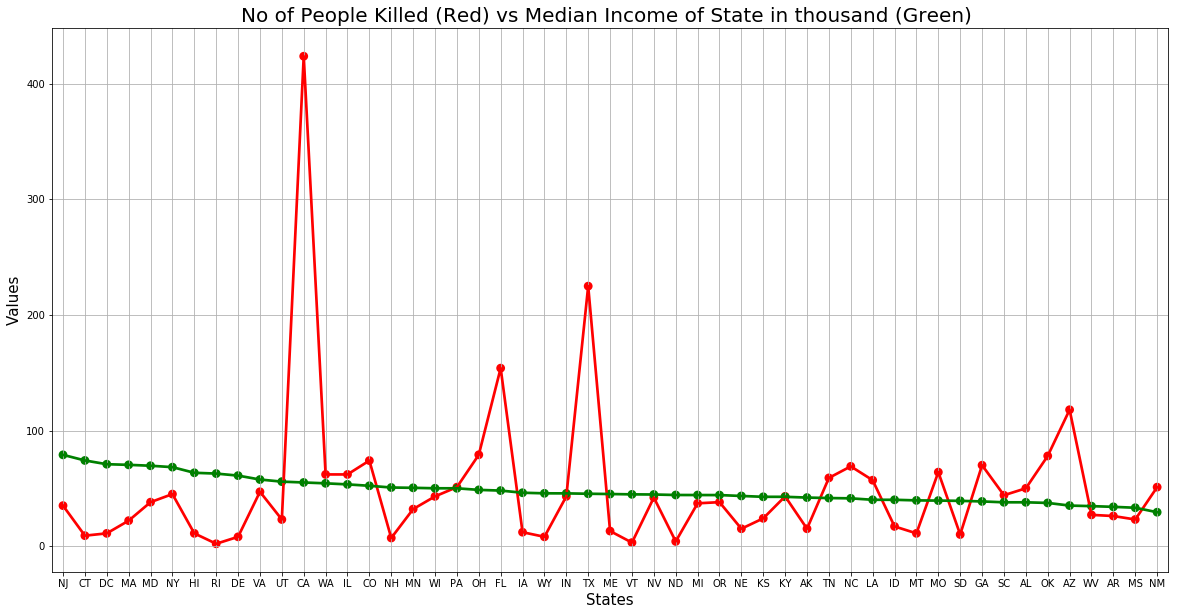

In [28]:
# cleaning the data and converting median income to int values
income['Median Income'].fillna(0,inplace=True)
income['Median Income'].replace(['(X)','-','2,500-','250,000+'],0,inplace = True) 
income['Median Income'] = income['Median Income'].astype(int)
avg_income = income.groupby("Geographic Area")["Median Income"].mean()
df_income = pd.DataFrame({"State":avg_income.index,"Median Income":avg_income})
killed_income = pd.merge(killed,df_income)
killed_income['Median Income'] = killed_income['Median Income'].round()/1000

#plotting graph
f,ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x='State',y ='People Killed',data=killed_income.sort_values(by=['Median Income'],ascending=False)
              ,color='red')
sns.pointplot(x='State',y = 'Median Income', data=killed_income.sort_values(by=['Median Income'],ascending=False)
              ,color='green')
plt.xlabel("States",fontsize = 15)
plt.ylabel("Values",fontsize = 15)
plt.title("No of People Killed (Red) vs Median Income of State in thousand (Green) ",fontsize = 20)
plt.grid()